In [ ]:
import google.colab
google.colab.auth.authenticate_user()

#authentication and establish connection
from google.colab import drive
drive.mount('/content/drive')

!ls '/content/drive/My Drive'

Mounted at /content/drive
 BasedOnMaterial   ClassData  'Colab Notebooks'   Edited.csv


In [ ]:
import tensorflow as tf
import os

In [ ]:
%cd /content/drive/MyDrive
os.listdir('/content/drive/MyDrive/ClassData')

/content/drive/MyDrive


['NotCoin', 'Coin']

In [ ]:
import cv2
import imghdr
from matplotlib import pyplot as plt

In [ ]:
data_dir = '/content/drive/MyDrive/ClassData'
os.listdir(data_dir)

['NotCoin', 'Coin']

In [ ]:
image_exts=['jpg','jpeg','png','bmp']

In [ ]:
img=cv2.imread(os.path.join('ClassData','NotCoin','NotCoin24.jpg'))
imghdr.what(os.path.join('ClassData','NotCoin','NotCoin24.jpg'))

'jpeg'

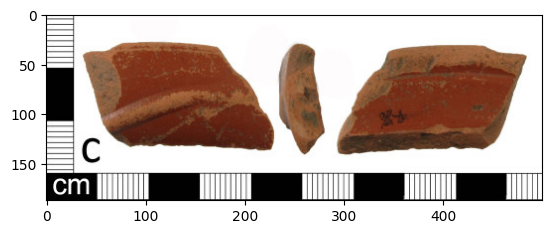

In [ ]:
img.shape
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
for image_class in os.listdir(data_dir):
  for image in os.listdir(os.path.join(data_dir,image_class)):
    image_path = os.path.join(data_dir,image_class,image)
    try:
      img = cv2.imread(image_path)
      tip = imghdr.what(image_path)
      if tip not in image_exts:
        print('Image not in ext list {}'.format(image_path))
        os.remove(image_path)
    except Exception as e:
      print('Issue with image {}'.format(image_path))

In [ ]:
#tf.data.Dataset??
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
tf.keras.utils.image_dataset_from_directory('ClassData',batch_size=16, image_size=(128,128))
data = tf.keras.utils.image_dataset_from_directory('ClassData')

Found 904 files belonging to 2 classes.
Found 904 files belonging to 2 classes.


In [ ]:
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()
batch[1]

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

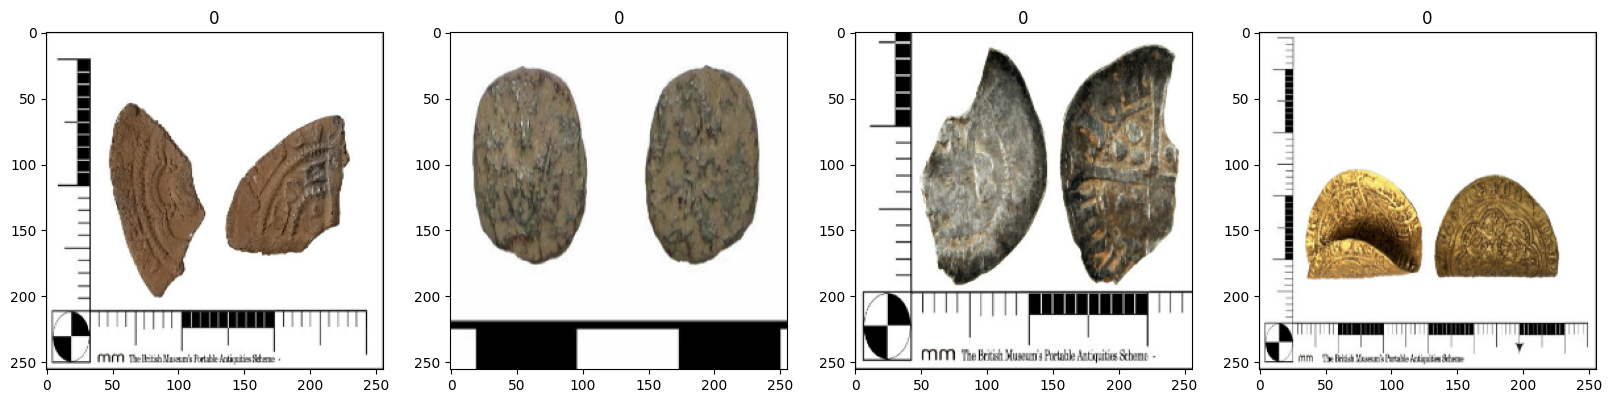

In [ ]:
fig,ax = plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

In [ ]:
scaled = batch[0]/255
scaled.min()

0.0

In [ ]:
data = data.map(lambda x,y:(x/255,y))
scaled_iterator = data.as_numpy_iterator()
batch = scaled_iterator.next()
batch[0].max()

1.0

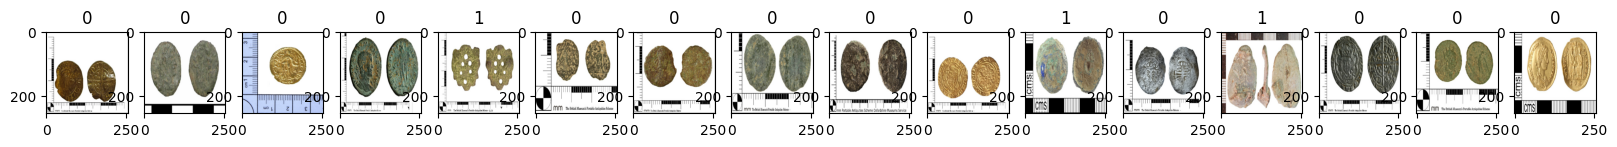

In [ ]:
fig,ax = plt.subplots(ncols=16,figsize=(20,20))
for idx,img in enumerate(batch[0][:16]):
  ax[idx].imshow(img)
  ax[idx].title.set_text(batch[1][idx])

In [ ]:
len(data)
train_size = int(len(data)*.6)
val_size = int(len(data)*.3)+1
test_size = int(len(data)*.1)+1

In [ ]:
train_size+ test_size+ val_size

29

In [ ]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)
len(test)

3

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense,Flatten,Dropout

In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(16,(3,3), 1, activation = 'relu', input_shape =(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3), 1, activation = 'relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16,(3,3), 1, activation = 'relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(256,activation = 'relu'))
model.add(Dense(1,activation = 'sigmoid'))

In [ ]:
model.compile('adam',loss= tf.losses.BinaryCrossentropy(), metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

In [ ]:
logdir = '/content/drive/MyDrive/ClassData'

In [ ]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logdir)
hist = model.fit(train,epochs= 20, validation_data = val,callbacks = [tensorboard_callback])

Epoch 1/20
17/17 [==============================] - 72s 4s/step - loss: 0.8243 - accuracy: 0.8125 - val_loss: 0.3612 - val_accuracy: 0.8924
Epoch 2/20
17/17 [==============================] - 42s 2s/step - loss: 0.3933 - accuracy: 0.8474 - val_loss: 0.3148 - val_accuracy: 0.8819
Epoch 3/20
17/17 [==============================] - 42s 2s/step - loss: 0.2865 - accuracy: 0.8824 - val_loss: 0.2011 - val_accuracy: 0.9306
Epoch 4/20
17/17 [==============================] - 41s 2s/step - loss: 0.2139 - accuracy: 0.9265 - val_loss: 0.1533 - val_accuracy: 0.9444
Epoch 5/20
17/17 [==============================] - 40s 2s/step - loss: 0.1856 - accuracy: 0.9320 - val_loss: 0.1868 - val_accuracy: 0.9306
Epoch 6/20
17/17 [==============================] - 42s 2s/step - loss: 0.1463 - accuracy: 0.9430 - val_loss: 0.1331 - val_accuracy: 0.9549
Epoch 7/20
17/17 [==============================] - 41s 2s/step - loss: 0.1304 - accuracy: 0.9504 - val_loss: 0.1780 - val_accuracy: 0.9271
Epoch 8/20
17/17 [==

In [ ]:
hist.history

{'loss': [0.8242933750152588,
  0.3933278024196625,
  0.28647059202194214,
  0.2139434963464737,
  0.18563735485076904,
  0.14626824855804443,
  0.13040892779827118,
  0.09467162936925888,
  0.10167475789785385,
  0.06824863702058792,
  0.05709008872509003,
  0.044416118413209915,
  0.039706334471702576,
  0.03024332970380783,
  0.02093963511288166,
  0.013319632038474083,
  0.01212144922465086,
  0.008030510507524014,
  0.005890278611332178,
  0.03013126365840435],
 'accuracy': [0.8125,
  0.8474264740943909,
  0.8823529481887817,
  0.9264705777168274,
  0.9319853186607361,
  0.9430146813392639,
  0.9503676295280457,
  0.9742646813392639,
  0.9650735259056091,
  0.9761029481887817,
  0.9834558963775635,
  0.9852941036224365,
  0.9908088445663452,
  0.9908088445663452,
  0.9944853186607361,
  0.998161792755127,
  0.9963235259056091,
  0.998161792755127,
  0.998161792755127,
  0.9944853186607361],
 'val_loss': [0.3612027168273926,
  0.31477057933807373,
  0.20109790563583374,
  0.1532639

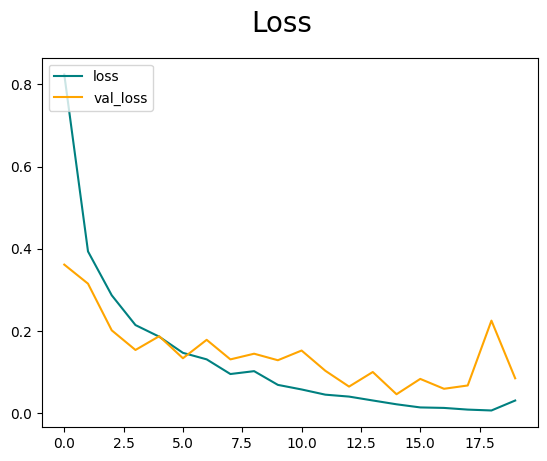

In [ ]:
fig = plt.figure()
plt.plot(hist.history["loss"],color = 'teal',label = 'loss')
plt.plot(hist.history["val_loss"],color = 'orange',label = 'val_loss')
fig.suptitle('Loss', fontsize = 20)
plt.legend(loc="upper left")
plt.show()

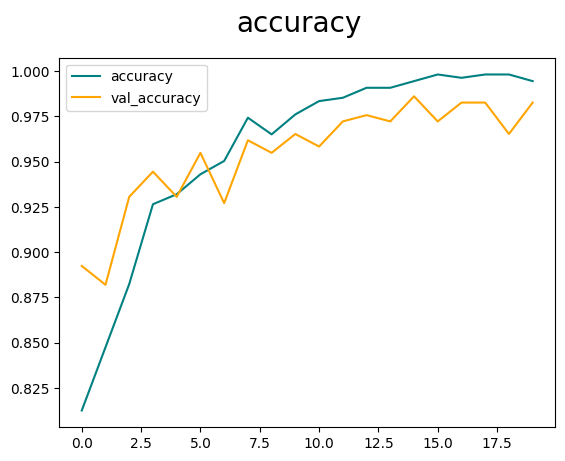

In [ ]:
fig = plt.figure()
plt.plot(hist.history["accuracy"],color = 'teal',label = 'accuracy')
plt.plot(hist.history["val_accuracy"],color = 'orange',label = 'val_accuracy')
fig.suptitle('accuracy', fontsize = 20)
plt.legend(loc="upper left")
plt.show()

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
pre = Precision()
rec = Recall()
acc = BinaryAccuracy()
len(test)

3

In [ ]:
for batch in test.as_numpy_iterator():
  X,y = batch
  yhat = model.predict(X)
  pre.update_state(y,yhat)
  rec.update_state(y,yhat)
  acc.update_state(y,yhat)

1/1 [==============================] - 0s 178ms/step


In [ ]:
print(f'Precision: {pre.result().numpy()}, Recall: {rec.result().numpy()}, Accuracy: {acc.result().numpy()}')

Precision: 1.0, Recall: 0.800000011920929, Accuracy: 0.9722222089767456


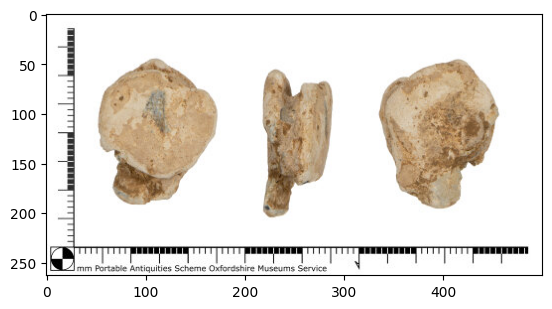

In [ ]:
img = cv2.imread('/content/drive/MyDrive/ClassData/NotCoin/NotCoin71.jpg')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

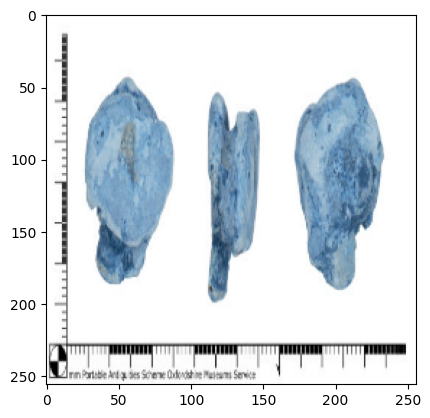

In [ ]:
resize = tf.image.resize(img,(256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
np.expand_dims(resize,0).shape

(1, 256, 256, 3)

In [ ]:
yhat = model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 40ms/step


In [ ]:
yhat

array([[0.9530021]], dtype=float32)

In [ ]:
if yhat > 0.5:
  print(f'Predicted class is not a coin')
else:
  print(f'Predicted class is Coin')

Predicted class is not a coin


In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model.save(os.path.join('models','classcoinModel.h5'))

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
os.path.join('models','classcoinModel.h5')

'models/classcoinModel.h5'

In [ ]:
new_model = load_model(os.path.join('models','classcoinModel.h5'))

In [ ]:
yhatnew = new_model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 91ms/step


In [ ]:
if yhatnew > 0.5:
  print(f'Predicted class is not a coin')
else:
  print(f'Predicted class is Coin')

Predicted class is not a coin


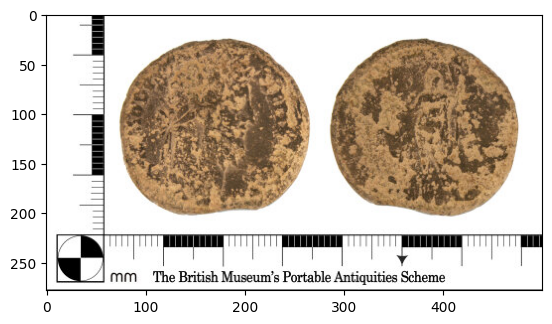

In [ ]:
img = cv2.imread('/content/drive/MyDrive/ClassData/Coin/Coin345.jpg')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

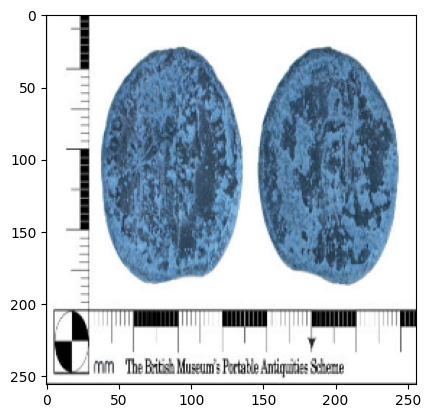

In [ ]:
resize = tf.image.resize(img,(256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
np.expand_dims(resize,0).shape

(1, 256, 256, 3)

In [ ]:
yhat = model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 31ms/step


In [ ]:
yhat

array([[0.00444462]], dtype=float32)

In [ ]:
if yhat > 0.5:
  print(f'Predicted class is not a coin')
else:
  print(f'Predicted class is Coin')

Predicted class is Coin
